# Simple Equation

Let us now implement the following equation:
$$ y = x^2 $$

where $x = 2$

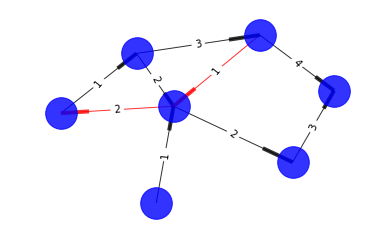

In [24]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = { 'A': 1.0,
            'D': 0.5714285714285714,
            'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
for u,v,d in G.edges(data=True)])

red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color=edge_colors, edge_cmap=plt.cm.Reds)
nx.draw_networkx_nodes(G, pos, node_color='b', alpha=0.8, node_size=1000)


plt.axis('off')
plt.show()

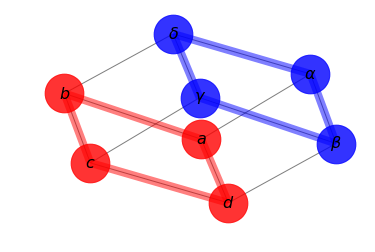

In [2]:
#!/usr/bin/env python

%matplotlib inline


import matplotlib.pyplot as plt
import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos, nodelist=[0,1,2,3], node_color='r', node_size=1500, alpha=0.8)
nx.draw_networkx_nodes(G,pos, nodelist=[4,5,6,7], node_color='b', node_size=1500, alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G,pos, edgelist=[(0,1),(1,2),(2,3),(3,0)], width=8,alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G,pos, edgelist=[(4,5),(5,6),(6,7),(7,4)], width=8,alpha=0.5, edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)


plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

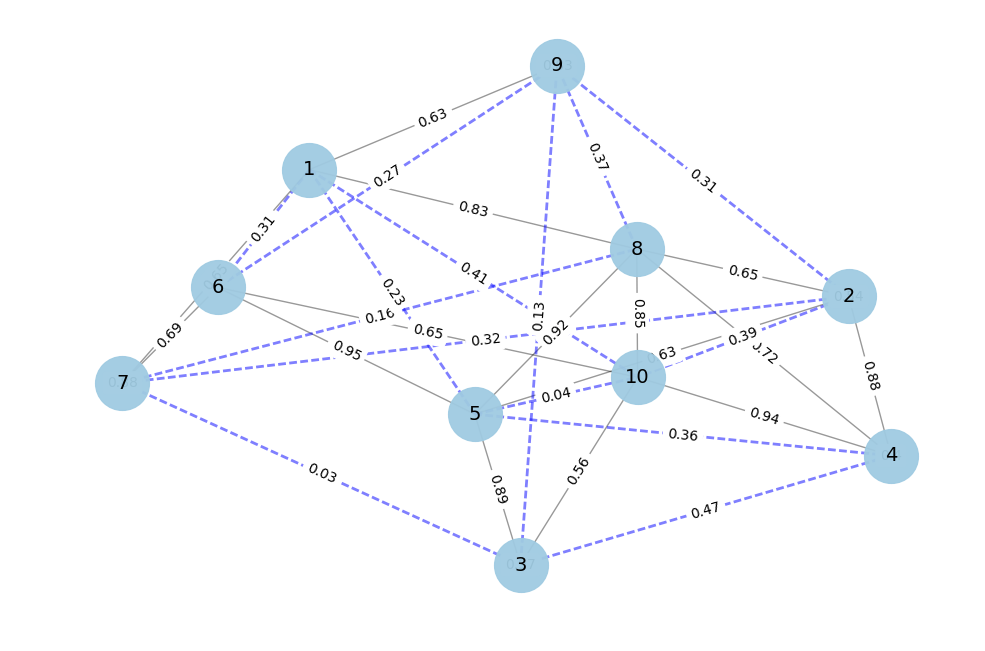

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import random

G=nx.Graph()

# insert data
#G.add_edge('a','b',weight=0.6)
#G.add_edge('a','c',weight=0.2)
#G.add_edge('c','d',weight=0.1)
#G.add_edge('c','e',weight=0.7)
#G.add_edge('c','f',weight=0.9)
#G.add_edge('a','d',weight=0.3)
n = 10
for i in range(n):
    for j in range(5):
        G.add_edge(random.randint(1,n),random.randint(1,n),weight=round(random.random(),2))
    

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

# positions for all nodes
pos=nx.spring_layout(G)

# figure properties set (onlly before add node/edge-data)
plt.figure(figsize=(12,8), dpi=100)
#plt.figure(figsize=(10,10), dpi=100, facecolor='w', edgecolor='k') 
#plt.scatter(1, 1, s=100, alpha=0.5)
plt.axis('off')

# nodes
nx.draw_networkx_nodes(G, pos, node_color='#A0CBE2', node_size=1500, alpha=0.95, linewidths=1.0)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, alpha=0.4, with_labels=True)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='b', style='dashed')

# node labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# edge labels
edge_labels=dict([ ((u,v,),d['weight']) for u,v,d in G.edges(data=True) ])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)


#plt.savefig("weighted_graph.png") # save as png
plt.show() # display